In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset
df = pd.read_csv(r"C:\Users\patil\Downloads\bank_marketing_updated_v1.csv")

print(df.head())

   customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1

In [2]:
#Checking the structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [3]:
#Impute missing values in 'age' column with the median age
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

In [4]:
#Impute missing values with the mode (most frequent value) of the 'month' column
mode_month = df['month'].mode()[0]
df['month'].fillna(mode_month, inplace=True)

In [5]:
# Impute missing values with the mode (most frequent value) of the 'response' column
mode_response = df['response'].mode()[0]
df['response'].fillna(mode_response, inplace=True)

In [6]:
#checking null values
print(df.isnull().sum())

customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
dtype: int64


In [7]:
#Check for duplicate rows
print(df.duplicated().sum())

0


In [8]:
# 1. Dropping customer id column
df.drop('customerid', axis='columns', inplace=True)

df.head()


age  salary  balance  marital                  jobedu targeted default  \
0  58.0  100000     2143  married     management,tertiary      yes      no   
1  44.0   60000       29   single    technician,secondary      yes      no   
2  33.0  120000        2  married  entrepreneur,secondary      yes      no   
3  47.0   20000     1506  married     blue-collar,unknown       no      no   
4  33.0       0        1   single         unknown,unknown       no      no   

  housing loan  contact  day      month duration  campaign  pdays  previous  \
0     yes   no  unknown    5  may, 2017  261 sec         1     -1         0   
1     yes   no  unknown    5  may, 2017  151 sec         1     -1         0   
2     yes  yes  unknown    5  may, 2017   76 sec         1     -1         0   
3     yes   no  unknown    5  may, 2017   92 sec         1     -1         0   
4      no   no  unknown    5  may, 2017  198 sec         1     -1         0   

  poutcome response  
0  unknown       no  
1  unknown       no  
2  unknown       no  
3  unknown       no  
4  unknown       no

In [9]:
#Splitting 'jobedu' in two columns by using lambda function

# Job column
df['job'] = df['jobedu'].apply(lambda x: x.split(',')[0])

# Education column
df['education'] = df['jobedu'].apply(lambda x: x.split(',')[1])

# Drop the 'jobedu' column
df.drop('jobedu', axis = 1, inplace = True)

# Result
df.head()


age  salary  balance  marital targeted default housing loan  contact  day  \
0  58.0  100000     2143  married      yes      no     yes   no  unknown    5   
1  44.0   60000       29   single      yes      no     yes   no  unknown    5   
2  33.0  120000        2  married      yes      no     yes  yes  unknown    5   
3  47.0   20000     1506  married       no      no     yes   no  unknown    5   
4  33.0       0        1   single       no      no      no   no  unknown    5   

       month duration  campaign  pdays  previous poutcome response  \
0  may, 2017  261 sec         1     -1         0  unknown       no   
1  may, 2017  151 sec         1     -1         0  unknown       no   
2  may, 2017   76 sec         1     -1         0  unknown       no   
3  may, 2017   92 sec         1     -1         0  unknown       no   
4  may, 2017  198 sec         1     -1         0  unknown       no   

            job  education  
0    management   tertiary  
1    technician  secondary  
2  entrepreneur  secondary  
3   blue-collar    unknown  
4       unknown    unknown

In [10]:
# 3. Splitting the month column in two

# Month column
df['month1'] = df['month'].apply(lambda x: x.split(',')[0])

# Year column
df['year'] = df['month'].apply(lambda x: x.split(',')[1])

# Drop the 'month' column
df.drop('month', axis = 1, inplace = True)

# Result
df.head()


age  salary  balance  marital targeted default housing loan  contact  day  \
0  58.0  100000     2143  married      yes      no     yes   no  unknown    5   
1  44.0   60000       29   single      yes      no     yes   no  unknown    5   
2  33.0  120000        2  married      yes      no     yes  yes  unknown    5   
3  47.0   20000     1506  married       no      no     yes   no  unknown    5   
4  33.0       0        1   single       no      no      no   no  unknown    5   

  duration  campaign  pdays  previous poutcome response           job  \
0  261 sec         1     -1         0  unknown       no    management   
1  151 sec         1     -1         0  unknown       no    technician   
2   76 sec         1     -1         0  unknown       no  entrepreneur   
3   92 sec         1     -1         0  unknown       no   blue-collar   
4  198 sec         1     -1         0  unknown       no       unknown   

   education month1   year  
0   tertiary    may   2017  
1  secondary    may   2017  
2  secondary    may   2017  
3    unknown    may   2017  
4    unknown    may   2017

### Univariate Analysis¶


In [11]:
#Categorical Unordered Univariate Analysis

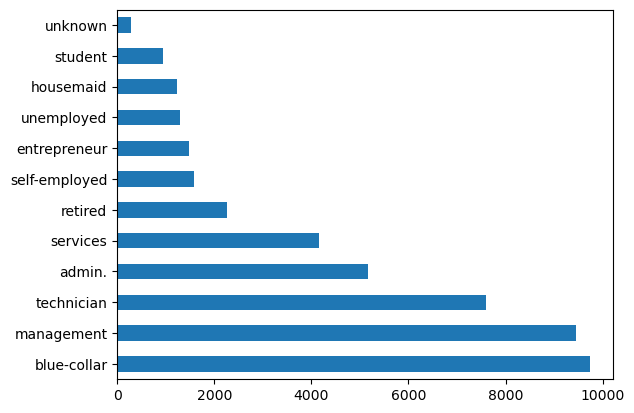

In [12]:
# Job status category

df.job.value_counts()

df.job.value_counts().plot.barh()
plt.show()


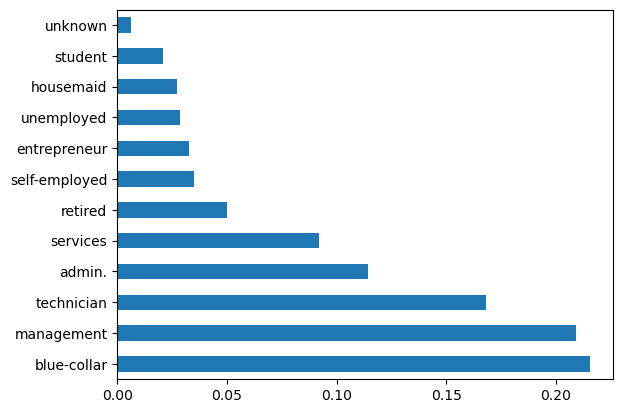

In [13]:
# Percentage of each job using normalize

df.job.value_counts(normalize = True)

df.job.value_counts(normalize = True).plot.barh()
plt.show()


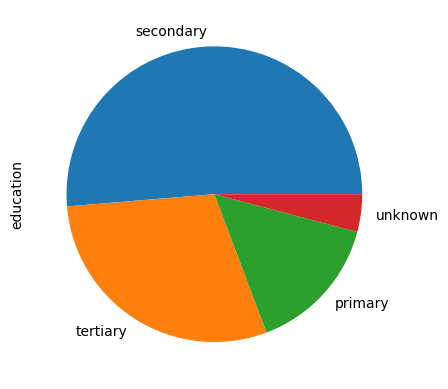

In [14]:
# Education variable

df.education.value_counts(normalize = True)

df.education.value_counts(normalize = True).plot.pie()
plt.show()


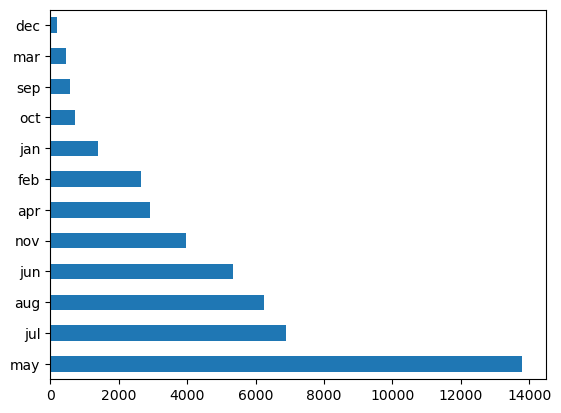

In [15]:
# month variable

df.month1.value_counts()

df.month1.value_counts().plot.barh()
plt.show()


In [16]:
#Numerical Univariate Analysis

In [17]:
# Age column

df.age.describe()

count    45211.000000
mean        40.934795
std         10.616926
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

#### Bivariate Analysis

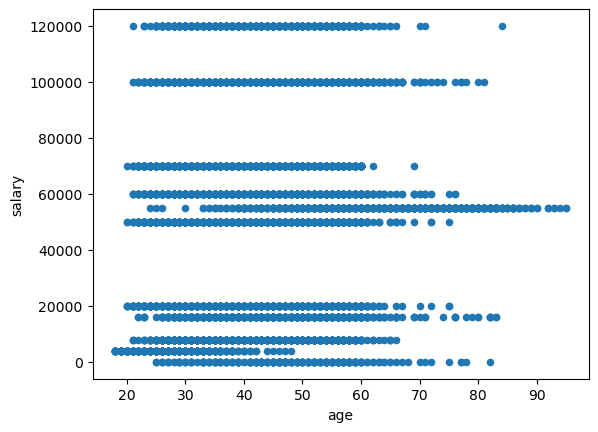

In [18]:
# Lets take the salary, balance and age variables

# 1. Age vs Salary

df.plot.scatter(x = "age", y = "salary")
plt.show()


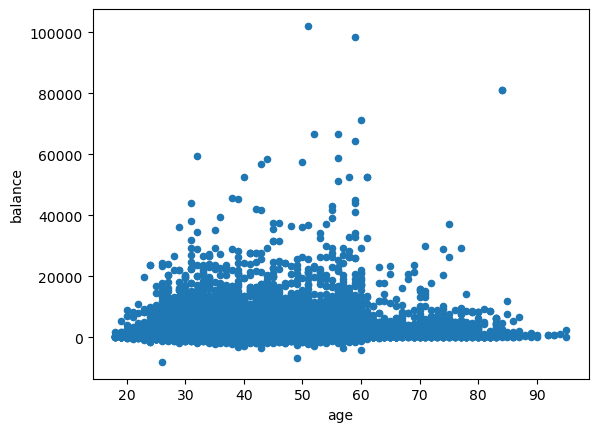

In [19]:
# 2. Age vs Balance

df.plot.scatter(x = "age", y = "balance")
plt.show()


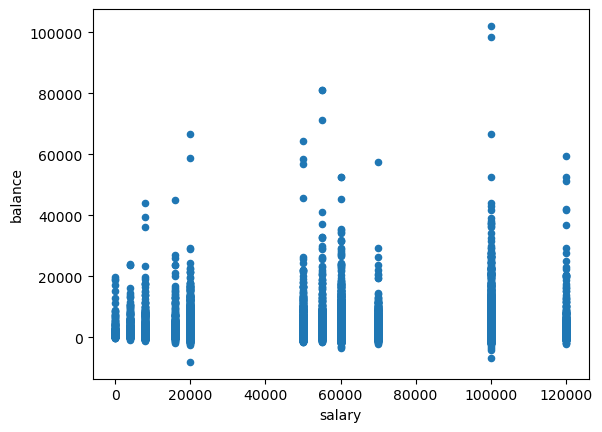

In [20]:
# 2. Salary vs Balance

df.plot.scatter(x = "salary", y = "balance")
plt.show()


In [21]:
# Corr function

df[['age', 'salary', 'balance']].corr()


age    salary   balance
age      1.000000  0.024366  0.097753
salary   0.024366  1.000000  0.055469
balance  0.097753  0.055469  1.000000

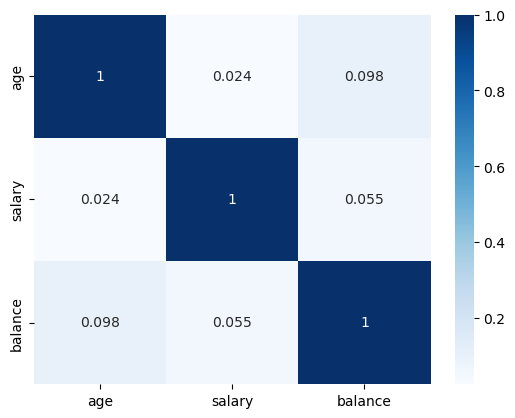

In [22]:
# Using seaborn heatmap

sns.heatmap(df[['age', 'salary', 'balance']].corr(), annot= True, cmap = 'Blues')
plt.show()


In [23]:
### Categorical Variables Analysis

In [24]:
# 1 = yes
# 0 = no

df['response_rate'] = np.where(df.response=='yes', 1, 0)
df.response_rate.value_counts()


0    39924
1     5287
Name: response_rate, dtype: int64

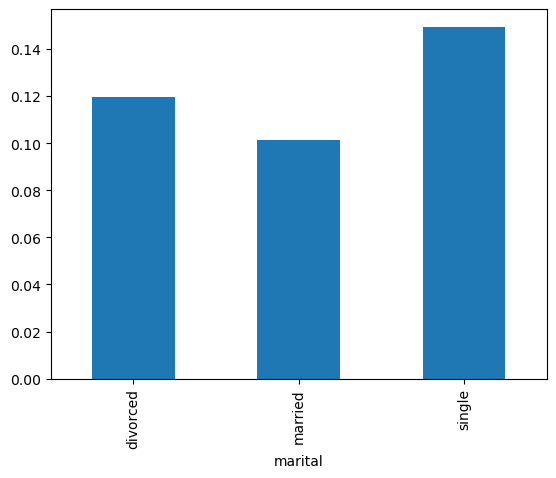

In [25]:
# Let’s see how the response rate varies for different categories in marital status.

df.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()


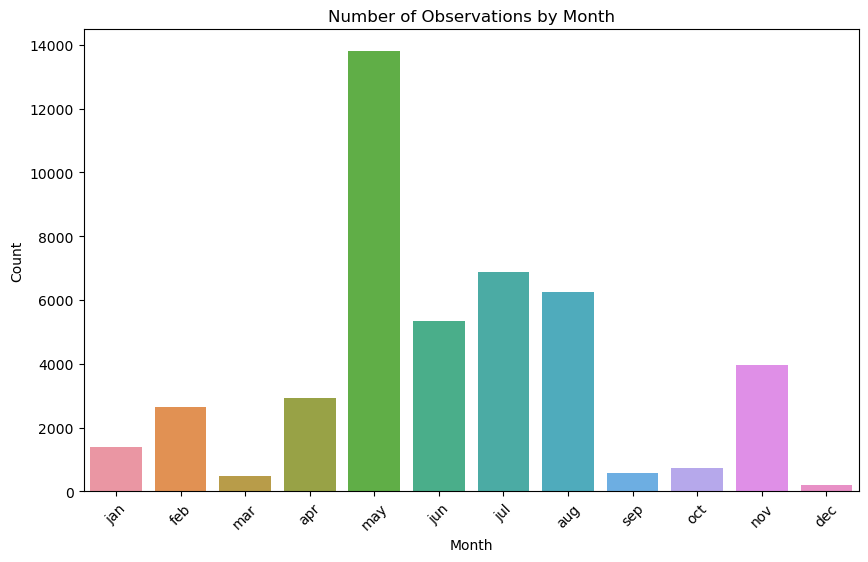

In [26]:
# Visualize temporal trends by month
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month1', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Number of Observations by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
